<a href="https://colab.research.google.com/github/thor4/neuralnets/blob/master/projects/1-CNN/step_5_generate_figure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize results

## 1: Load confidence & accuracy results
Run the cell to download a zip file from OSF then extract the following excel spreadsheets: `results_behavioral.xlsx`, `results_cifar10.xlsx`, `results_van3.xlsx`, and `results_vgg16-raw_conf.xlsx` into the current directory.

In [1]:
# @title Download results

import requests, os
from zipfile import ZipFile

print("Start downloading and unzipping `Confidence & accuracy results`...")
name = 'conf_acc_results'
fname = f"{name}.zip"
url = f"https://osf.io/xsf62/download" #osf share link
r = requests.get(url, allow_redirects=True)
with open(fname, 'wb') as fh:
  fh.write(r.content) #download file

with ZipFile(fname, 'r') as zfile:
  zfile.extractall() #extract contents

if os.path.exists(fname):
  os.remove(fname) #delete zip file
else:
  print(f"The file {fname} does not exist")

print("Download completed.")

Start downloading and unzipping `Confidence & accuracy results`...
Download completed.


These were the average confidence and accuracy results of the VGG16, CIFAR10 and Gabor models. The CIFAR10 and Gabor models used a vanilla CNN architecture. The VGG16 & CIFAR10 used transfer learning to fine-tune their top layers for the Gabor classification task. The Gabor model was trained specifically for the Gabor classifaction task. The behavioral results are also included and comprise the average confidence and accuracy results across 55 subjects.

In [2]:
# @title Download behavioral results matlab file

import requests, os
from zipfile import ZipFile

print("Start downloading and unzipping `Behavioral results matlab file`...")
name = 'behavioral_results'
fname = f"{name}.zip"
url = f"https://osf.io/wsg26/download" #osf share link
r = requests.get(url, allow_redirects=True)
with open(fname, 'wb') as fh:
  fh.write(r.content) #download file

with ZipFile(fname, 'r') as zfile:
  zfile.extractall() #extract contents

if os.path.exists(fname):
  os.remove(fname) #delete zip file
else:
  print(f"The file {fname} does not exist")

print("Download completed.")

Start downloading and unzipping `Behavioral results matlab file`...
Download completed.


The file is comprised of a 55x3x3 matrix labeled accuracy, a 55x3x3 matrix named confidence, and a vector of length 55 named subjects. The subjects vector contains the id of the subject data used. The accuracy matrix contains how accurate each subject was for each of 3 tilt and 3 contrast combinations in a subject x tilt x contrast shape. The confidence matrix contains the same thing, but has confidence values instead.

Load necessary libraries.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import loadmat
from scipy.stats import sem
import matplotlib.pyplot as plt
import matplotlib

In [4]:
results = loadmat('subject_results_sub_tilt_cont.mat')
results.keys()

dict_keys(['__header__', '__version__', '__globals__', 'accuracy', 'confidence', 'subjects'])

Extract confidence and accuracy.

In [5]:
accuracy = results['accuracy']
confidence = results['confidence']

In [ ]:
confidence.shape

(55, 3, 3)

How many total samples are there (55x3x3)?

In [ ]:
np.count_nonzero(confidence)

495

Repeat the tilt array 3 times for all conditions (9) then 55 times for all subjects.

In [6]:
#d = {'col1': [1, 2], 'col2': [3, 4]}

#beh_tilts = np.array([[1,2],[3,4]])
beh_tilts = np.array([1,1,1,2,2,2,3,3,3])
all_beh_tilts = np.tile(beh_tilts, 55)
#print(all_beh_tilts)
print(all_beh_tilts.shape)

(495,)


Do the same for contrast.

In [7]:
beh_contrast = np.array([1,2,3])
all_beh_contrast = np.tile(beh_contrast, 165)
#print(all_beh_contrast)
print(all_beh_contrast.shape)

(495,)


In [10]:
accuracy.shape

(55, 3, 3)

In [11]:
accuracy[1,:,:]

array([[0.53, 0.54, 0.5 ],
       [0.52, 0.53, 0.58],
       [0.69, 0.73, 0.7 ]])

Enable data table exploration for dataframes.

In [11]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

Confirm the flatten operation is unrolling accuracy first by subject (1st dim), then by tilt (2nd dim), then by contrast (3rd dim). `accuracy` is subject x tilt x contrast

In [13]:
df_beh = pd.DataFrame(columns=['Tilt','Contrast','Accuracy','Confidence']) #initialize dataframe
df_beh['Tilt'] = all_beh_tilts
df_beh['Contrast'] = all_beh_contrast
df_beh['Accuracy'] = accuracy.flatten(order='C')
df_beh['Confidence'] = confidence.flatten(order='C')
df_beh

,Tilt,Contrast,Accuracy,Confidence
0,1,1,0.64,1.90
1,1,2,0.69,1.87
2,1,3,0.70,2.18
3,2,1,0.65,1.94
4,2,2,0.79,1.95
...,...,...,...,...
490,2,2,0.66,1.81
491,2,3,0.82,1.90
492,3,1,0.67,1.86
493,3,2,0.90,1.99


Confirm that the third subject's data displays in dataframe.

In [9]:
df_beh[18:27] #subject 3 (every 9)

,Tilt,Contrast,Accuracy,Confidence
18,1,1,0.54,1.32
19,1,2,0.57,1.44
20,1,3,0.67,1.68
21,2,1,0.60,1.29
22,2,2,0.66,1.51
23,2,3,0.77,1.73
24,3,1,0.78,1.44
25,3,2,0.85,1.64
26,3,3,0.90,2.05


In [10]:
print(accuracy[2,:,:])
print(confidence[2,:,:])

[[0.54 0.57 0.67]
 [0.6  0.66 0.77]
 [0.78 0.85 0.9 ]]
[[1.32 1.44 1.68]
 [1.29 1.51 1.73]
 [1.44 1.64 2.05]]


This looks good.

Now, make a new dataframe for figure 1d calculating the difference in accuracy across tilts between contrasts 3 and 1, difference in accuracy across contrasts between tilts 3 and 1, difference in confidence across tilts between contrasts 3 and 1, and difference in confidence across contrasts between tilts 3 and 1.

In [29]:
avg_acc_x_tilts = accuracy.mean(axis=1) #avg acc across tilts
avg_acc_x_contrasts = accuracy.mean(axis=2) #avg acc across contrasts
avg_conf_x_tilts = confidence.mean(axis=1) #avg conf across tilts
avg_conf_x_contrasts = accuracy.mean(axis=2) #avg conf across contrasts
df_fig1d = pd.DataFrame(columns=['Acc diff x tilts','Acc diff x contrasts',
                                 'Conf diff x tilts','Conf diff x contrasts']) #initialize dataframe
df_fig1d['Acc diff x tilts'] = np.abs(avg_acc_x_tilts[:,2] - avg_acc_x_tilts[:,0])
df_fig1d['Acc diff x contrasts'] = np.abs(avg_acc_x_contrasts[:,2] - avg_acc_x_contrasts[:,0])
df_fig1d['Conf diff x tilts'] = np.abs(avg_conf_x_tilts[:,2] - avg_conf_x_tilts[:,0])
df_fig1d['Conf diff x contrasts'] = np.abs(avg_conf_x_contrasts[:,2] - avg_conf_x_contrasts[:,0])
df_fig1d

,Acc diff x tilts,Acc diff x contrasts,Conf diff x tilts,Conf diff x contrasts
0,0.120000,0.236667,0.576667,0.236667
1,0.013333,0.183333,0.916667,0.183333
2,0.140000,0.250000,0.470000,0.250000
3,0.000000,0.206667,0.053333,0.206667
4,0.066667,0.073333,0.326667,0.073333
5,0.130000,0.246667,0.063333,0.246667
6,0.013333,0.176667,0.333333,0.176667
7,0.133333,0.190000,0.513333,0.190000
8,0.160000,0.243333,0.680000,0.243333
9,0.216667,0.276667,0.856667,0.276667


In [17]:
group_by_tilt = df_beh.groupby(['Tilt'])

In [19]:
for name,group in group_by_tilt:
   print(name)
   print(group.shape)  

1
(165, 4)
2
(165, 4)
3
(165, 4)


should be 9 different arrays ([tilt,contrast] combinations) of length 55 (55 subjects):

In [30]:
grouped = df_beh.groupby(['Tilt','Contrast'])
for name,group in grouped:
   print(name)
   print(group.shape)   

(1, 1)
(55, 4)
(1, 2)
(55, 4)
(1, 3)
(55, 4)
(2, 1)
(55, 4)
(2, 2)
(55, 4)
(2, 3)
(55, 4)
(3, 1)
(55, 4)
(3, 2)
(55, 4)
(3, 3)
(55, 4)


In [16]:
for name,group in grouped['Accuracy']:
   print(name)
   print(group.shape)   

(1, 1)
(55,)
(1, 2)
(55,)
(1, 3)
(55,)
(2, 1)
(55,)
(2, 2)
(55,)
(2, 3)
(55,)
(3, 1)
(55,)
(3, 2)
(55,)
(3, 3)
(55,)


In [11]:
grouped['Accuracy'].agg(np.mean)

Tilt  Contrast
1     1           0.558909
      2           0.587818
      3           0.609091
2     1           0.589455
      2           0.667091
      3           0.708727
3     1           0.698909
      2           0.786727
      3           0.826364
Name: Accuracy, dtype: float64

Group by tilt & contrast and calculate the standard error of the mean for all 55 subjects' confidence and accuracy scores.

In [31]:
grouped = df_beh.groupby(['Tilt','Contrast'])
sem_conf = grouped['Confidence'].agg(sem)
sem_acc = grouped['Accuracy'].agg(sem)

In [14]:
sem_conf

Tilt  Contrast
1     1           0.064195
      2           0.062081
      3           0.059975
2     1           0.064704
      2           0.062115
      3           0.056786
3     1           0.062264
      2           0.058879
      3           0.057765
Name: Confidence, dtype: float64

In [17]:
sem_conf.iloc[8]

0.0577649947008966

In [18]:
sem_acc.iloc[8]

0.014061825095187759

Setup all the plotting helper functions.

In [46]:
def show_sem(axs, fig): #get sem for fig 1a-c plots
  y_measurement = []
  if fig == "1a":
    err_b = sem_acc
  elif fig == "1b":
    err_b = sem_conf
  for idx,p in enumerate(axs.patches):    
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    axs.errorbar(_x, _y, yerr=err_b.iloc[idx], color="k")
    y_measurement.append(_y)
  return y_measurement
def draw_fig1a(df_beh, ax1):
  fig1a = sns.barplot(data=df_beh, x="Tilt", y="Accuracy", 
                hue="Contrast", palette="pastel", ci=None, ax=ax1)
  ax1.set_ylim(0.5,1), ax1.set_xlabel('Magnitude of tilt')
  mean_acc = show_sem(ax1, "1a")
  return mean_acc
def draw_fig1b(df_beh, ax2):
  fig1b = sns.barplot(data=df_beh, x="Tilt", y="Confidence", 
                hue="Contrast", palette="pastel", ci=None, ax=ax2)
  ax2.set_ylim(1.5,3.5), ax2.set_xlabel('Magnitude of tilt')
  mean_conf = show_sem(ax2, "1b")
  return mean_conf
def draw_fig1c(ax1, ax2, mean_acc, mean_conf):
  fig1c_x = [mean_acc[6], mean_acc[4], mean_acc[2]]
  fig1c_y = [mean_conf[6], mean_conf[4], mean_conf[2]]
  colors_1c = [plt.cm.Set3(0), plt.cm.Set3(3), plt.cm.Set3(4)]
  for idx, color in enumerate(['Contrast 3 Tilt 1', 'Contrast 2 Tilt 2', 
                             'Contrast 1 Tilt 3']):
    ax3.scatter(fig1c_x[idx], fig1c_y[idx], color=colors_1c[idx], label=color,
               marker='d', linewidths=5)
  ax3.legend()
  ax3.errorbar(fig1c_x, fig1c_y, xerr=np.array(sem_acc.iloc[[6, 4, 2]]), 
             yerr=np.array(sem_conf.iloc[[6, 4, 2]]), color="k", 
             linestyle='None', elinewidth=0.5)
  ax3.set_ylim(2,2.8), ax3.set_xlim(0.58,0.72)
  ax3.set_xlabel('Accuracy'), ax3.set_ylabel('Confidence') 
def draw_fig1d(df_fig1d, ax4):
  ax4.set_xlabel(r'$\Delta$Accuracy') 
  ax4.set_ylabel('Accuracy') 
  tilt_acc_diff = df_fig1d['Acc diff x contrasts'].mean()
  cont_acc_diff = df_fig1d['Acc diff x tilts'].mean()
  tilt_conf_diff = df_fig1d['Conf diff x contrasts'].mean()
  cont_conf_diff = df_fig1d['Conf diff x tilts'].mean()
  ax4.bar([1,2], [tilt_acc_diff,cont_acc_diff], color = 'red') 
  ax4.tick_params(axis ='y', labelcolor = 'black') 
  # Adding Twin Axes
  ax5 = ax4.twinx() 
  ax5.set_xlabel(r'$\Delta$ Confidence') 
  ax5.set_ylabel('Confidence') 
  ax5.bar([3,4], [tilt_conf_diff,cont_conf_diff], color = 'blue') 
  ax5.tick_params(axis ='y', labelcolor = 'black') 

Draw the plots.

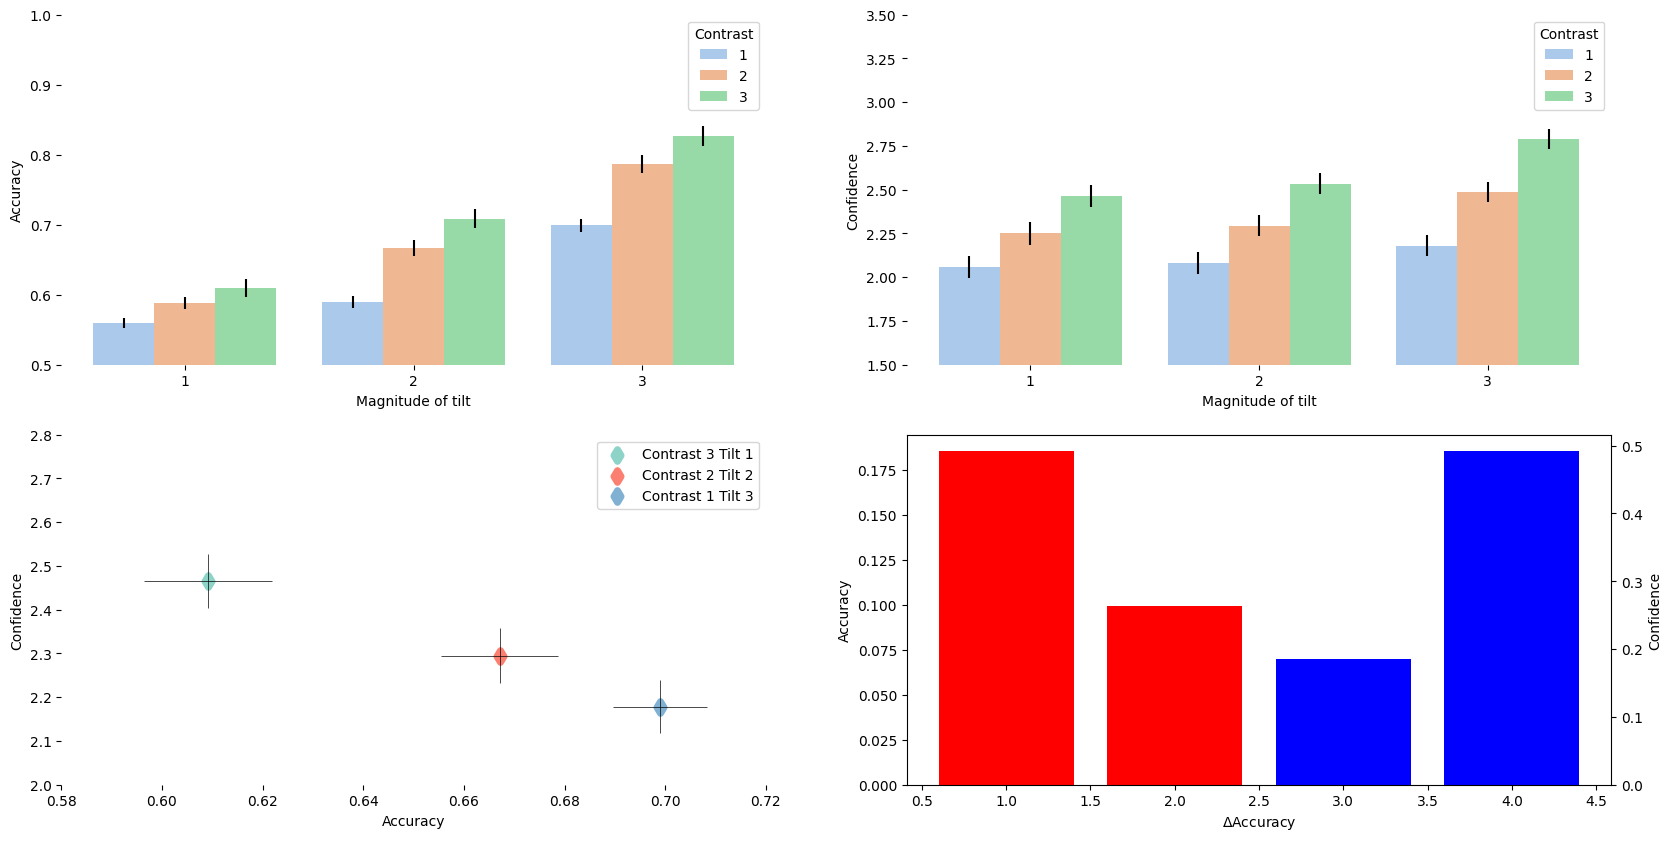

In [47]:
#sns.set_theme(style="whitegrid")
matplotlib.rc_file_defaults() #reset defaults
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,10)) #set up canvas
sns.despine(fig, left=True, bottom=True)
mean_acc = draw_fig1a(df_beh, ax1)
mean_conf = draw_fig1b(df_beh, ax2)
draw_fig1c(ax1, ax2, mean_acc, mean_conf)
draw_fig1d(df_fig1d, ax4)
#plt.tight_layout()
#plt.savefig('conf_acc_van3.png', transparent=True, dpi=300)

#STOPPED HERE, WORK ON DRAW_FIG1D FUNCTION NEXT, ADD SEM, FIX THE X-AXIS, ADD LEGEND, FIX SCALE

Set the NaN indices for behavior results.

In [ ]:
print(df_cif['Tilt'])
print(df_van3['Tilt'])
print(df_vgg['Tilt'])

0     0.1
1     NaN
2     NaN
3     0.2
4     NaN
5     NaN
6     0.4
7     NaN
8     NaN
9     0.8
10    NaN
11    NaN
12    1.6
13    NaN
14    NaN
15    3.2
16    NaN
17    NaN
Name: Tilt, dtype: float64
0     0.1
1     NaN
2     NaN
3     0.2
4     NaN
5     NaN
6     0.4
7     NaN
8     NaN
9     0.8
10    NaN
11    NaN
12    1.6
13    NaN
14    NaN
15    3.2
16    NaN
17    NaN
Name: Tilt, dtype: float64
0     0.1
1     NaN
2     NaN
3     0.2
4     NaN
5     NaN
6     0.4
7     NaN
8     NaN
9     0.8
10    NaN
11    NaN
12    1.6
13    NaN
14    NaN
15    3.2
16    NaN
17    NaN
Name: Tilt, dtype: float64


Set the NaN indices for model results.

In [ ]:
df_nanidx_mod = [1,2,4,5,7,8,10,11,13,14,16,17]

Remove all the NaNs.

In [ ]:
df_beh.loc[df_nanidx,'Tilt'] = [1.0,1.0,2.0,2.0,3.0,3.0]
df_cif.loc[df_nanidx_mod,'Tilt'] = [0.1,0.1,0.2,0.2,0.4,0.4,0.8,0.8,1.6,1.6,3.2,3.2]
df_van3.loc[df_nanidx_mod,'Tilt'] = [0.1,0.1,0.2,0.2,0.4,0.4,0.8,0.8,1.6,1.6,3.2,3.2]
df_vgg.loc[df_nanidx_mod,'Tilt'] = [0.1,0.1,0.2,0.2,0.4,0.4,0.8,0.8,1.6,1.6,3.2,3.2]

In [ ]:
print(df_beh['Tilt'])
print(df_vgg['Tilt'])

0    1.0
1    1.0
2    1.0
3    2.0
4    2.0
5    2.0
6    3.0
7    3.0
8    3.0
Name: Tilt, dtype: float64
0     0.1
1     0.1
2     0.1
3     0.2
4     0.2
5     0.2
6     0.4
7     0.4
8     0.4
9     0.8
10    0.8
11    0.8
12    1.6
13    1.6
14    1.6
15    3.2
16    3.2
17    3.2
Name: Tilt, dtype: float64


In [ ]:
df_cif.head()

,Tilt,Contrast,Accuracy,Confidence
0,0.1,0.30,0.520,0.688855
1,0.1,0.45,0.511,0.683615
2,0.1,1.00,0.526,0.742383
3,0.2,0.30,0.497,0.696570
4,0.2,0.45,0.503,0.697424


# STOPPED HERE: NEED RAW DATA FOR CONF INT. LOAD MAT FILE

## 2: Extract confidence and accuracy

In [ ]:
accuracy = results['accuracy']

Let's check the first subject's accuracy for all 9 tilt x contrast combinations.

In [ ]:
accuracy[0] 

array([[0.64, 0.69, 0.7 ],
       [0.65, 0.79, 0.84],
       [0.84, 0.95, 0.95]])

Now, let's average over all subjects to find the mean accuracy for each tilt x contrast condition.

In [ ]:
avg_acc = np.average(accuracy, axis=0)
avg_acc

array([[0.55890909, 0.58781818, 0.60909091],
       [0.58945455, 0.66709091, 0.70872727],
       [0.69890909, 0.78672727, 0.82636364]])

Do the same for confidence.

In [ ]:
avg_conf = np.average(results['confidence'], axis=0)
avg_conf

array([[2.05836364, 2.25127273, 2.46509091],
       [2.08072727, 2.29509091, 2.53545455],
       [2.17872727, 2.48781818, 2.792     ]])

In [ ]:
avg_acc.flatten() #unroll avg acc matrix

array([0.55890909, 0.58781818, 0.60909091, 0.58945455, 0.66709091,
       0.70872727, 0.69890909, 0.78672727, 0.82636364])

## 3: Create dataframe of results and save to Excel

Create a dataframe containing all average results with tilt x contrast assignments.

In [ ]:
df_results = pd.DataFrame({'Accuracy':avg_acc.flatten(),
                           'Confidence':avg_conf.flatten()})
df_results = df_results.assign(Tilt = [1, 1, 1, 2, 2, 2, 3, 3, 3],
                         Contrast = [1, 2, 3, 1, 2, 3, 1, 2, 3])

In [ ]:
df_results

,Accuracy,Confidence,Tilt,Contrast
0,0.558909,2.058364,1,1
1,0.587818,2.251273,1,2
2,0.609091,2.465091,1,3
3,0.589455,2.080727,2,1
4,0.667091,2.295091,2,2
5,0.708727,2.535455,2,3
6,0.698909,2.178727,3,1
7,0.786727,2.487818,3,2
8,0.826364,2.792000,3,3


Group the results by tilt and contrast for a clearer visualization.

In [ ]:
df_results_groupbyta = df_results.reset_index().set_index(['Tilt','Contrast'])
del df_results_groupbyta['index']
df_results_groupbyta

Accuracy  Confidence
Tilt Contrast                      
1    1         0.558909    2.058364
     2         0.587818    2.251273
     3         0.609091    2.465091
2    1         0.589455    2.080727
     2         0.667091    2.295091
     3         0.708727    2.535455
3    1         0.698909    2.178727
     2         0.786727    2.487818
     3         0.826364    2.792000

Save to disk.

In [ ]:
results_excel_filepath = os.path.join(os.getcwd(), 'results_behavioral.xlsx') #prep path to save to
df_results_groupbyta.to_excel(results_excel_filepath, index=True) #save to disk